# 15th September 2023 assignment - Data preprocessing on Titanic dataset

## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import dataset

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
corr = data.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

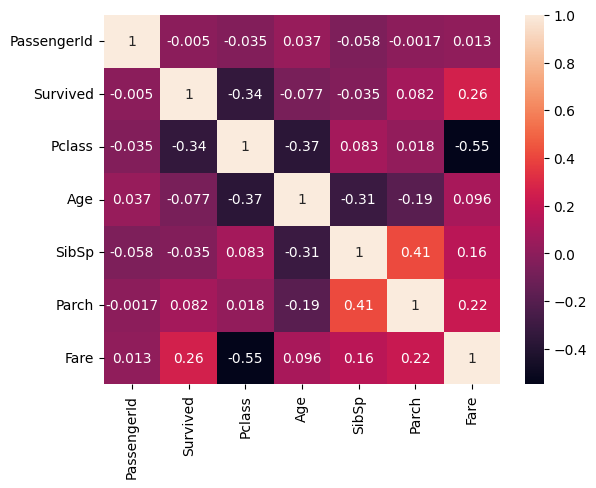

In [8]:
sns.heatmap(corr, annot=True) # heatmap is a pictorial representation of a matrix

## 3. Handle null values

In [9]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns - age, cabin and embarked - have null values

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We shall replace the null values of "Age" by replacing it with mean

In [12]:
median_age = round(data["Age"].median())

In [13]:
median_age

28

In [14]:
data["Age"].fillna(median_age, inplace=True)

In [15]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Null values of "Age" column have been handled

To handle the null values of "Cabin", we shall just replace all the values of the "Cabin" column to whether or not the Cabin number is specified or not

In [16]:
data["Cabin_known"] = data["Cabin"].notna().astype(int)
data.drop("Cabin", axis=1, inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [18]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
Cabin_known    False
dtype: bool

Null values of "Cabin" have been handled 

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Cabin_known    0
dtype: int64

To handle the null values of "Embarked" column, we shall omit that particular row containing the null values as there are only 2 such rows

In [20]:
data = data.dropna(subset=["Embarked"])

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [22]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
Cabin_known    False
dtype: bool

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_known    0
dtype: int64

There are no null values anymore 

## 4. Data Visualization

<Axes: >

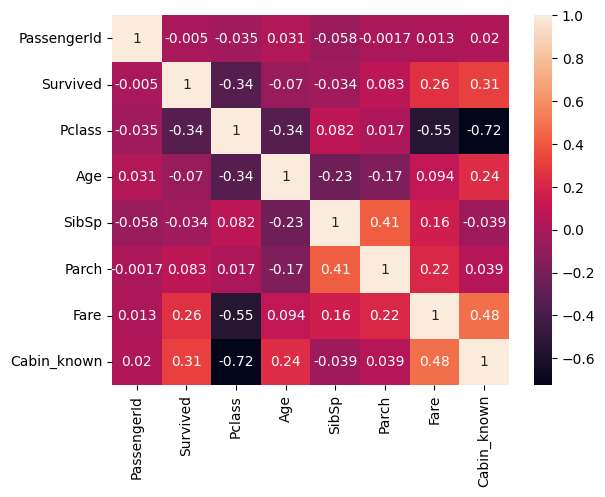

In [24]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

c:\users\ishan\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


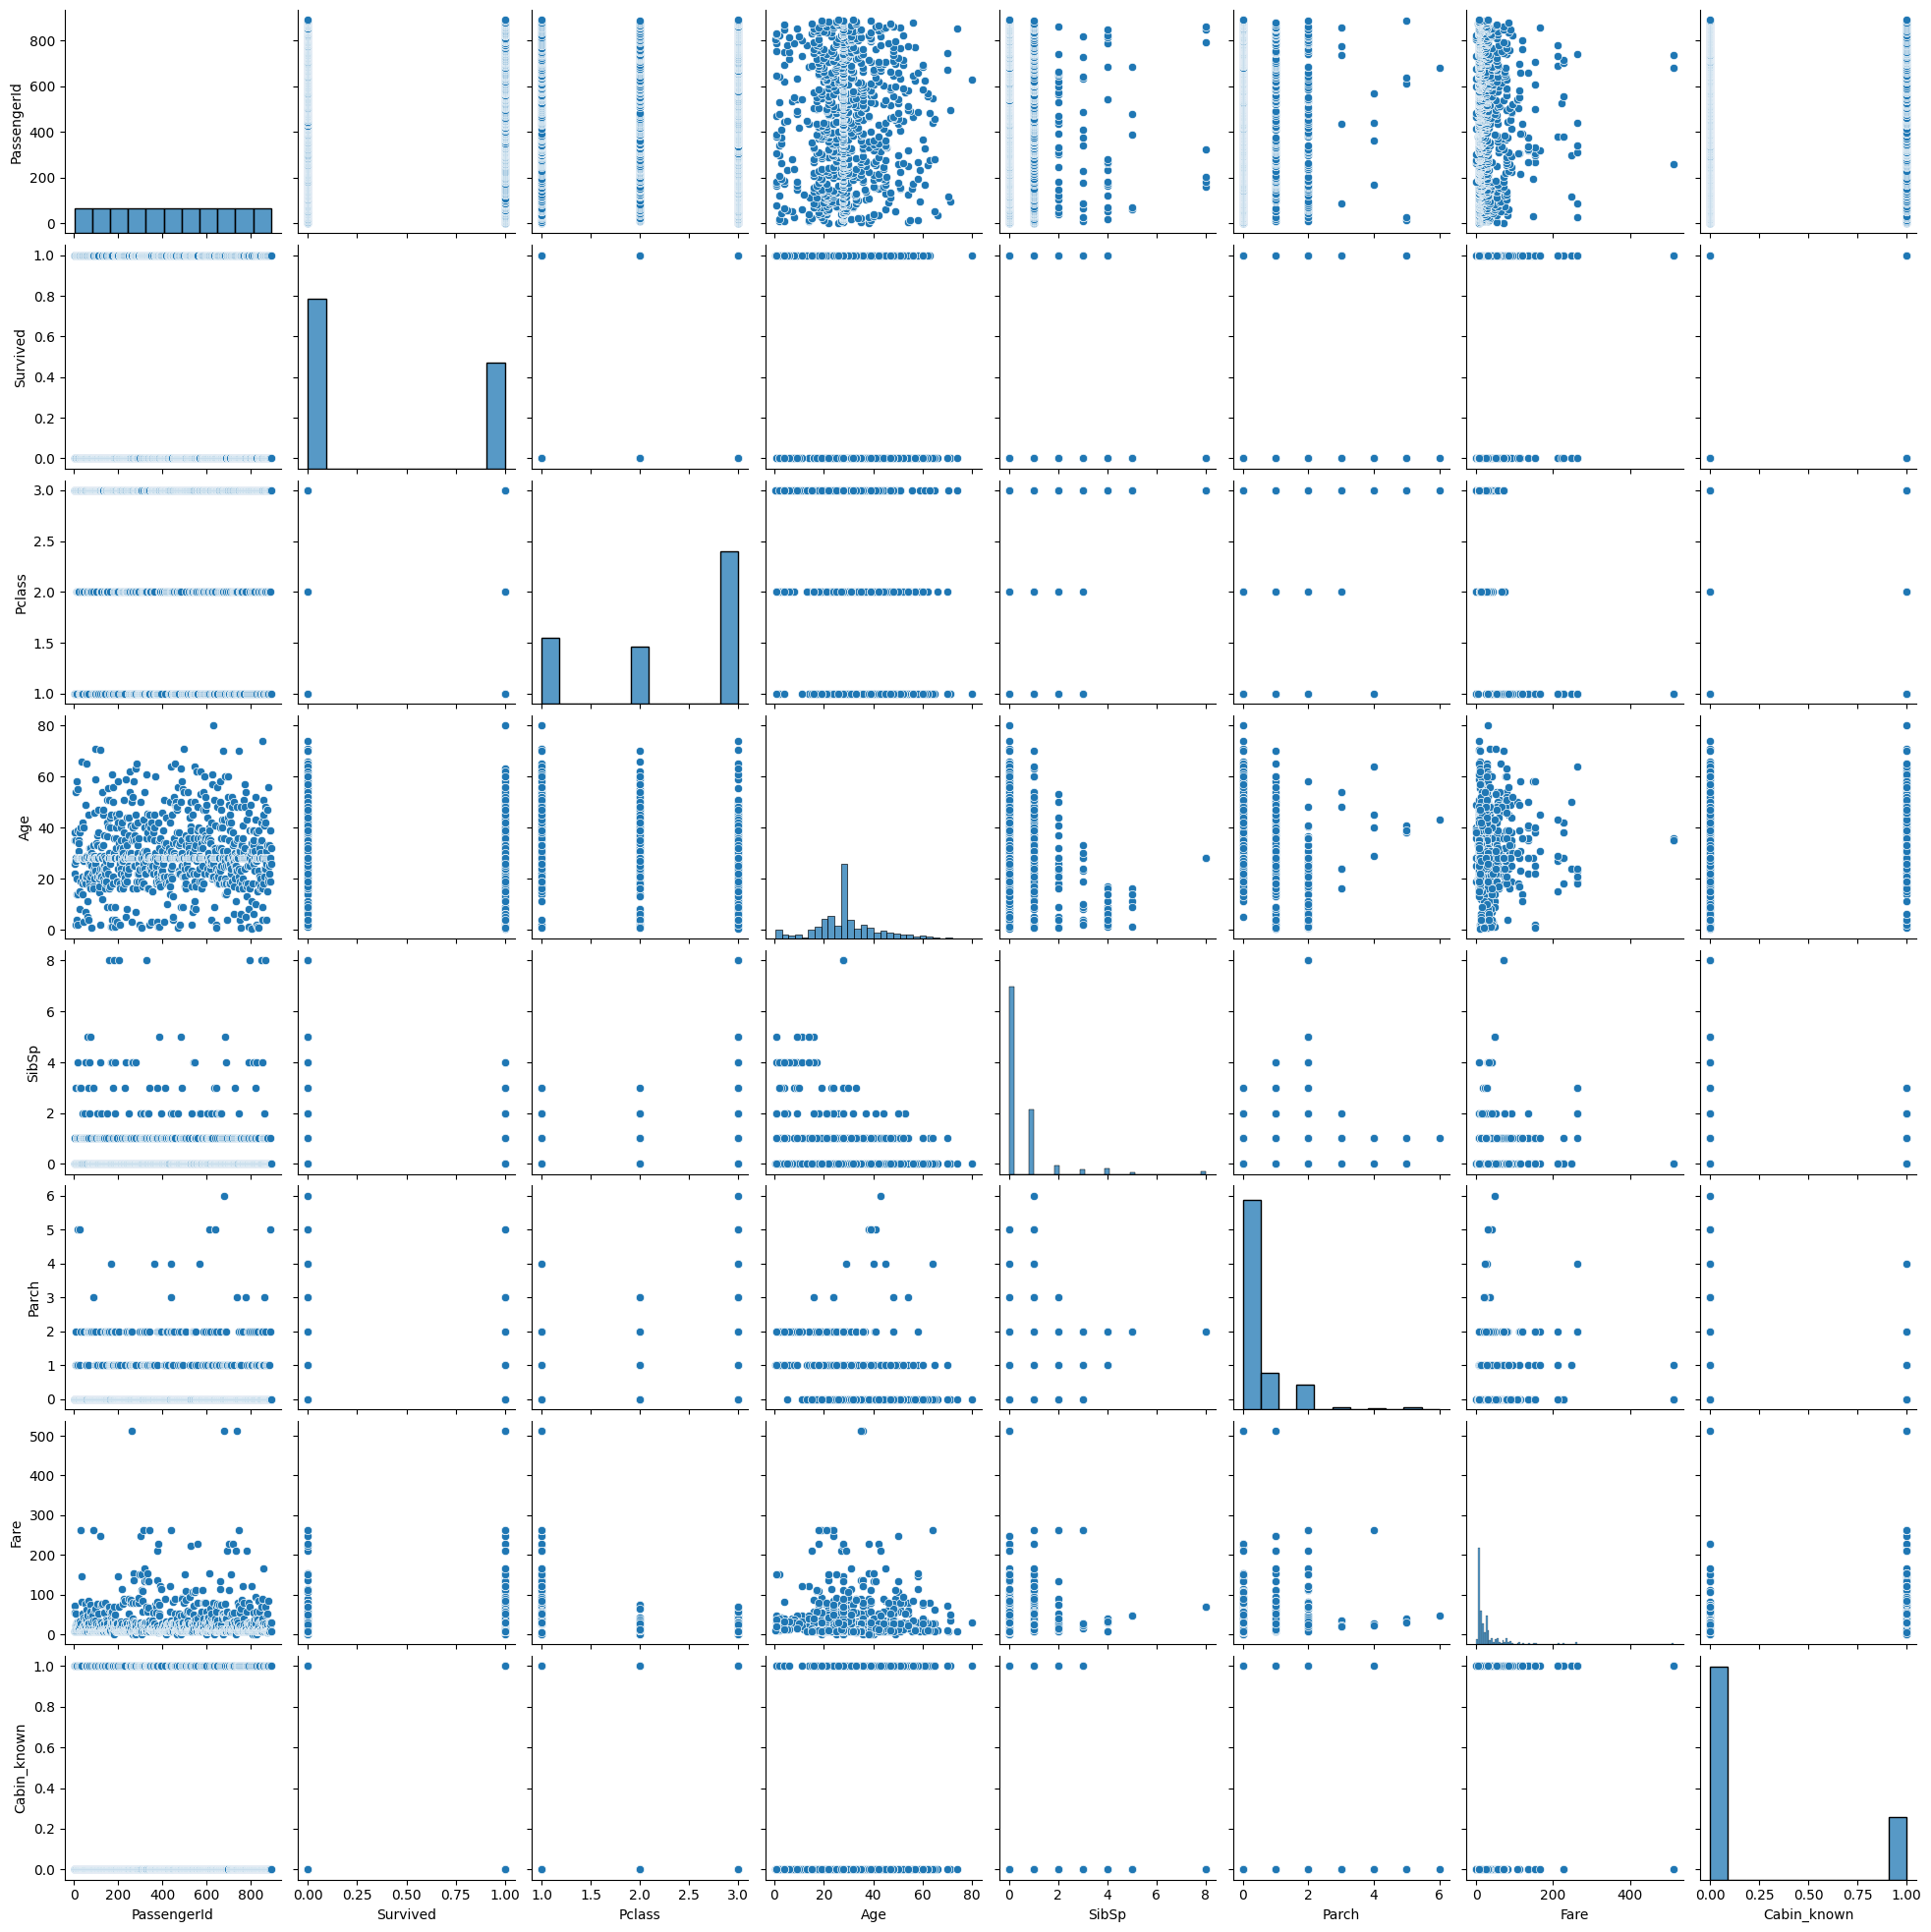

In [25]:
sns.pairplot(data)

## 5. Outlier Detection

In [26]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [27]:
data["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [28]:
data["Survived"].unique()

array([0, 1], dtype=int64)

In [29]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [30]:
data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [31]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

We shall perform outlier detection on "Age" and "Fare"

<Axes: >

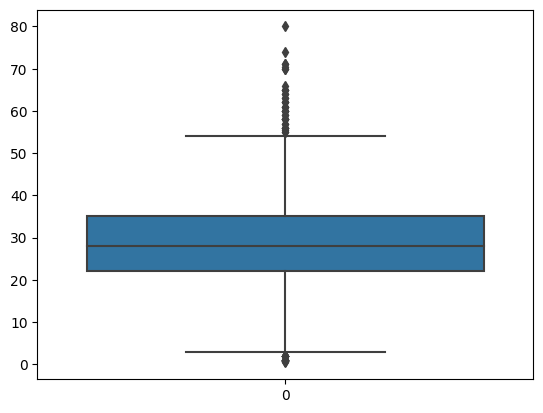

In [32]:
sns.boxplot(data["Age"])

<Axes: >

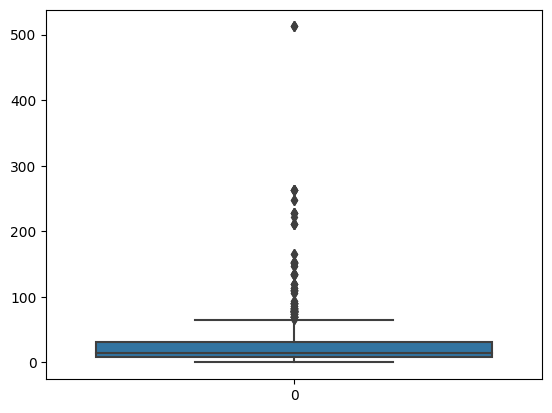

In [33]:
sns.boxplot(data["Fare"])

There are outliers in the "Age" and "Fare" column

We shall remove it by replacing with median

For "Age" column -

In [34]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3-q1
iqr

13.0

In [35]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul, ll

(54.5, 2.5)

In [36]:
median = data.Age.median()
median

28.0

In [37]:
data = data[data['Age'] <= median]
data = data[data['Age'] >= ll]

<Axes: >

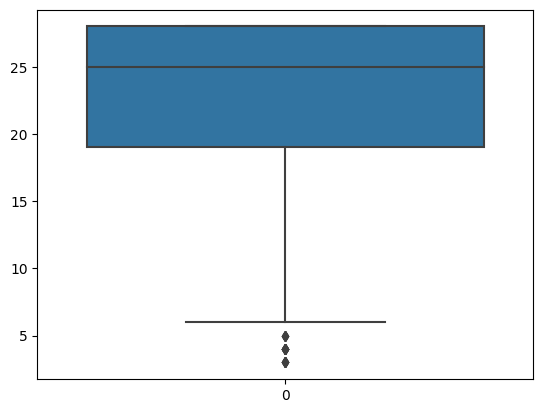

In [38]:
sns.boxplot(data['Age'])

To remove the lower outliers, we shall use the z score method

In [39]:
from scipy import stats

In [40]:
zscore_age = stats.zscore(data.Age)
zscore_age

0     -0.095452
2      0.520944
5      0.829142
8      0.675043
9     -1.328244
         ...   
884    0.366845
886    0.675043
887   -0.557749
888    0.829142
889    0.520944
Name: Age, Length: 515, dtype: float64

In [41]:
data = data[np.abs(zscore_age) <= 1]

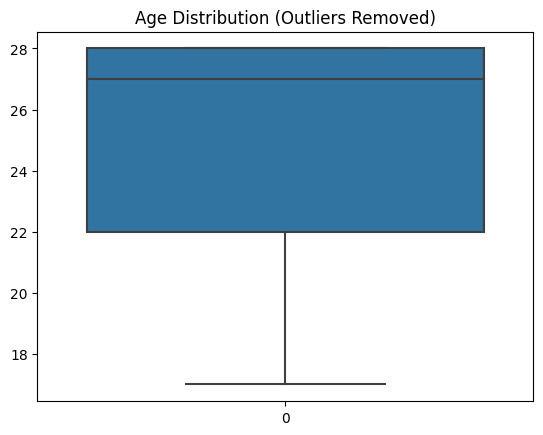

In [42]:
sns.boxplot(data['Age'])
plt.title('Age Distribution (Outliers Removed)')
plt.show()

For "Fare" column -

<Axes: >

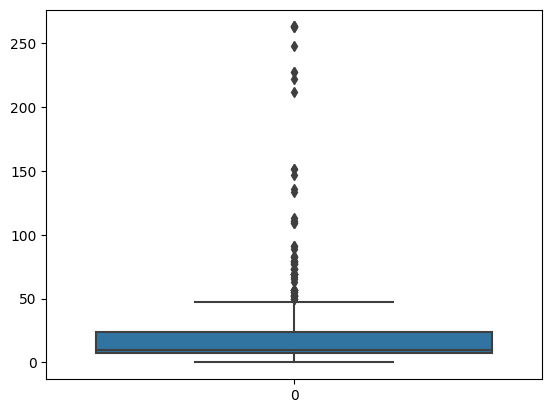

In [43]:
sns.boxplot(data["Fare"])

We will follow the same method to remove outliers 

In [44]:
p99 = data.Fare.quantile(0.99)

In [45]:
data = data[data.Fare <= p99]

<Axes: >

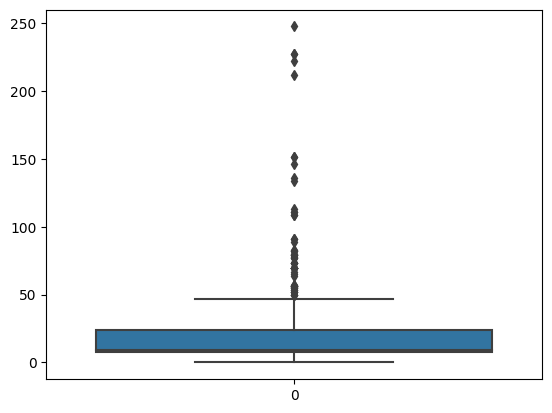

In [46]:
sns.boxplot(data.Fare)

In [47]:
zscore_fare = stats.zscore(data.Fare)
zscore_fare

0     -0.479680
2     -0.459471
5     -0.443504
8     -0.363417
12    -0.455729
         ...   
884   -0.485668
886   -0.307530
887    0.201434
888    0.005333
889    0.201434
Name: Fare, Length: 434, dtype: float64

In [48]:
data = data[np.abs(zscore_fare) <= 1]

<Axes: >

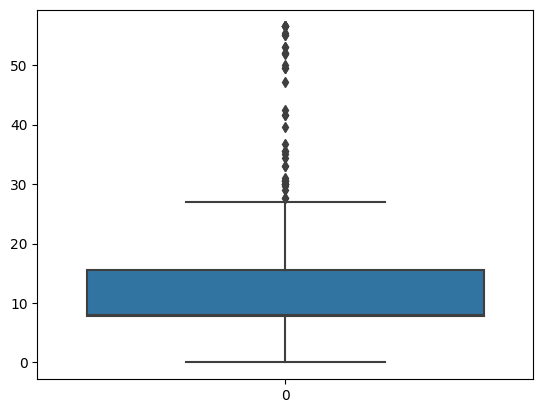

In [49]:
sns.boxplot(data.Fare)

In [50]:
q1 = data.Fare.quantile(0.25)
q3 = data.Fare.quantile(0.75)
iqr = q3-q1
iqr

7.75

In [51]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul, ll

(27.125, -3.875)

In [52]:
median = data.Fare.median()
median

8.05

In [53]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul, ll

(27.125, -3.875)

In [54]:
data = data[(data['Fare'] >= ll) & (data['Fare'] <= median)]

<Axes: >

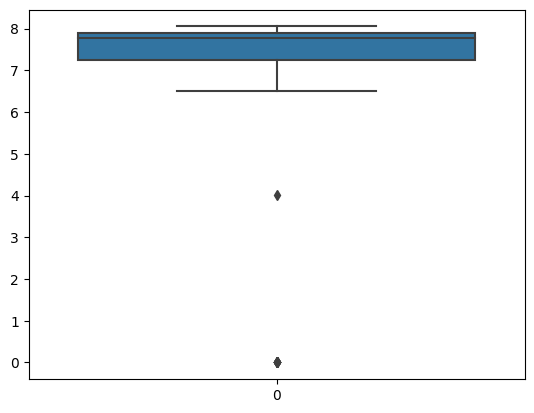

In [55]:
sns.boxplot(data['Fare'])

Even though all the outliers are not removed, we have removed most of it. Hence we will stop it with this.

## 6. Splitting into dependent and independent variables

"Survived" column - x - dependent variable - Dataframe / 2D Array

Remaining columns - y - independent variables - Series

In [59]:
x = data.drop(columns=["Survived", "Name", "Ticket"], axis=1)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,1,3,male,22.0,1,0,7.250,S,0
2,3,3,female,26.0,0,0,7.925,S,0
12,13,3,male,20.0,0,0,8.050,S,0
19,20,3,female,28.0,0,0,7.225,C,0
26,27,3,male,28.0,0,0,7.225,C,0


In [60]:
type(x)

pandas.core.frame.DataFrame

In [61]:
y = data["Survived"]
y.head()

0     0
2     1
12    0
19    1
26    0
Name: Survived, dtype: int64

In [62]:
type(y)

pandas.core.series.Series

## 7. Encoding

We shall encode "Sex" and "Embarked" columns

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()

In [65]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,1,3,male,22.0,1,0,7.250,S,0
2,3,3,female,26.0,0,0,7.925,S,0
12,13,3,male,20.0,0,0,8.050,S,0
19,20,3,female,28.0,0,0,7.225,C,0
26,27,3,male,28.0,0,0,7.225,C,0


For the "Sex" column - 

In [66]:
x["Sex"] = le.fit_transform(x["Sex"])

In [67]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,1,3,1,22.0,1,0,7.250,S,0
2,3,3,0,26.0,0,0,7.925,S,0
12,13,3,1,20.0,0,0,8.050,S,0
19,20,3,0,28.0,0,0,7.225,C,0
26,27,3,1,28.0,0,0,7.225,C,0


In [68]:
le.classes_

array(['female', 'male'], dtype=object)

In [69]:
map_for_sex = dict(zip(le.classes_, range(len(le.classes_))))

In [70]:
map_for_sex

{'female': 0, 'male': 1}

For the "Embarked" column - 

In [71]:
x["Embarked"] = le.fit_transform(x["Embarked"])

In [72]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,1,3,1,22.0,1,0,7.250,2,0
2,3,3,0,26.0,0,0,7.925,2,0
12,13,3,1,20.0,0,0,8.050,2,0
19,20,3,0,28.0,0,0,7.225,0,0
26,27,3,1,28.0,0,0,7.225,0,0


In [73]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [74]:
map_for_embarked = dict(zip(le.classes_, range(len(le.classes_))))

In [75]:
map_for_embarked

{'C': 0, 'Q': 1, 'S': 2}

## 8. Feature Scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
mms = MinMaxScaler()

In [78]:
mms

MinMaxScaler()

In [79]:
columns_to_scale = ["Age", "Fare", "SibSp", "Parch"]
x[columns_to_scale] = mms.fit_transform(x[columns_to_scale])

In [80]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,1,3,1,0.454545,0.25,0.0,0.485266,2,0
2,3,3,0,0.818182,0.00,0.0,0.919573,2,0
12,13,3,1,0.272727,0.00,0.0,1.000000,2,0
19,20,3,0,1.000000,0.00,0.0,0.469180,0,0
26,27,3,1,1.000000,0.00,0.0,0.469180,0,0


## 9. Splitting the data into training and testing set

In [81]:
from sklearn.model_selection import train_test_split

Let us perform the splitting with 80:20 ratio 

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [83]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
649,650,3,0,0.545455,0.0,0.0,0.678291,2,0
36,37,3,1,1.000000,0.0,0.0,0.471883,0,0
522,523,3,1,1.000000,0.0,0.0,0.469180,0,0
794,795,3,1,0.727273,0.0,0.0,0.900785,2,0
415,416,3,0,1.000000,0.0,0.0,1.000000,2,0


In [84]:
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
494,495,3,1,0.363636,0.0,0.0,1.000000,2,0
198,199,3,0,1.000000,0.0,0.0,0.806975,1,0
739,740,3,1,1.000000,0.0,0.0,0.900785,2,0
287,288,3,1,0.454545,0.0,0.0,0.900785,2,0
629,630,3,1,1.000000,0.0,0.0,0.796230,1,0


In [85]:
y_train.head()

649    1
36     1
522    0
794    0
415    0
Name: Survived, dtype: int64

In [86]:
y_test.head()

494    0
198    1
739    0
287    0
629    0
Name: Survived, dtype: int64